NECESSARY PACKAGES

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf    

DATA EXPLORATION

In [32]:
#load data
close_returns = pd.read_csv('DATA/ETF_ADJ_close_returns.csv', index_col='Date', parse_dates=True)
log_returns = pd.read_csv('DATA/ETF_log_returns.csv', index_col='Date', parse_dates=True)
# Check it loaded:
# close_returns
# log_returns

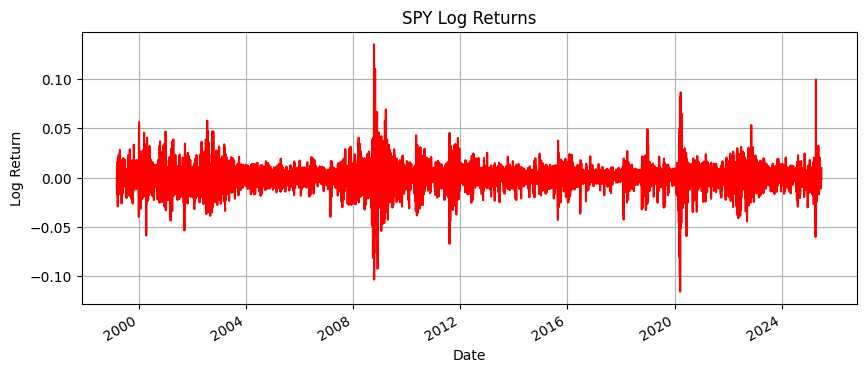

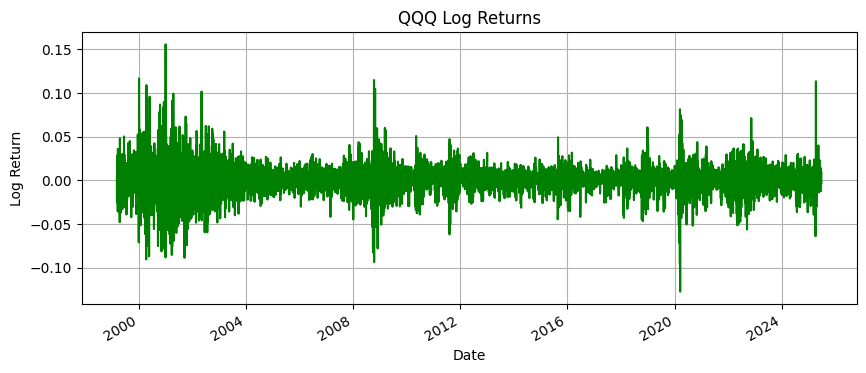

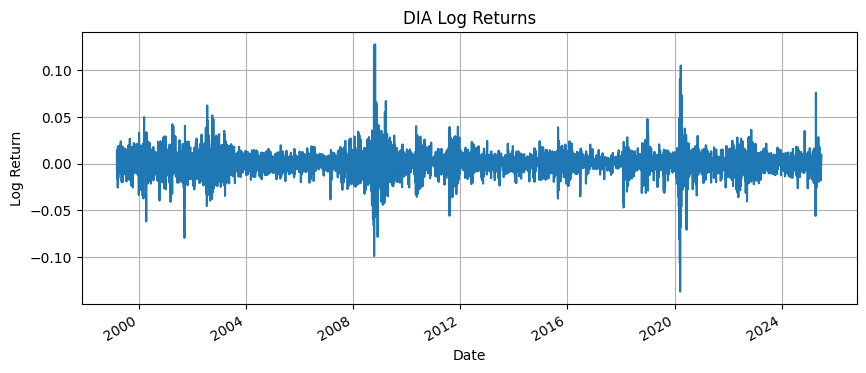

In [33]:
# SPY
log_returns['SPY'].plot(figsize=(10, 4),color = 'red', title='SPY Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

# QQQ
log_returns['QQQ'].plot(figsize=(10, 4),color = 'green',title='QQQ Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

# DIA
log_returns['DIA'].plot(figsize=(10, 4), title='DIA Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()


<Axes: xlabel='Date'>

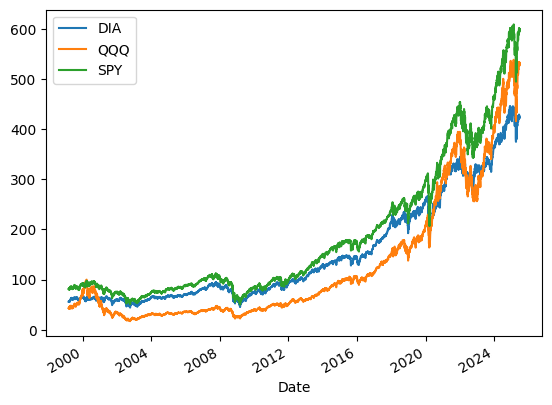

In [34]:
etfs = ['DIA','QQQ','SPY',] #line graph
close_returns[etfs].plot()

DATA STATS

In [35]:
print(log_returns.shape) #1-less row due to change giving n-1 
print(close_returns.shape)

(6612, 3)
(6613, 3)


In [18]:
# Total log return for each ETF:
total_log_return = log_returns.sum()
print("Total log return:")
print(total_log_return)

Total log return:
QQQ    2.508229
SPY    2.003025
DIA    2.031486
dtype: float64


In [19]:
total_cum_return = np.exp(total_log_return) - 1  # back - transform
print("Total cumulative % return:")
print(total_cum_return * 100)  # In percent

Total cumulative % return:
QQQ    1128.315814
SPY     641.144456
DIA     662.540963
dtype: float64


In [20]:
# Daily std deviation of log returns:
daily_volatility = log_returns.std()

print("Daily volatility (std dev of log returns):")
print(daily_volatility)

# If you want to annualize (assuming 252 trading days per year):
annualized_volatility = daily_volatility * np.sqrt(252)

print("\nAnnualized volatility (%):")
print((annualized_volatility * 100).round(2).astype('str') + '%')

Daily volatility (std dev of log returns):
QQQ    0.017135
SPY    0.012269
DIA    0.011703
dtype: float64

Annualized volatility (%):
QQQ     27.2%
SPY    19.48%
DIA    18.58%
dtype: object


DATA VISUALIZATION

In [37]:
#calculate wealth index
wealth_index = np.exp(log_returns.cumsum())

# Define a date *before* the first return
start_date = wealth_index.index.min() - pd.DateOffset(months=1)

# Create a Series(a singular row/value for the date) with a *single value* 1 at that date
base = pd.Series([1], index=[start_date])

# Prepend this base value to your growth index(stacking the 2)
wealth_index = pd.concat([base, wealth_index])

#ensures we start at base value 1 and not at the percent change of day 1 to day 2 

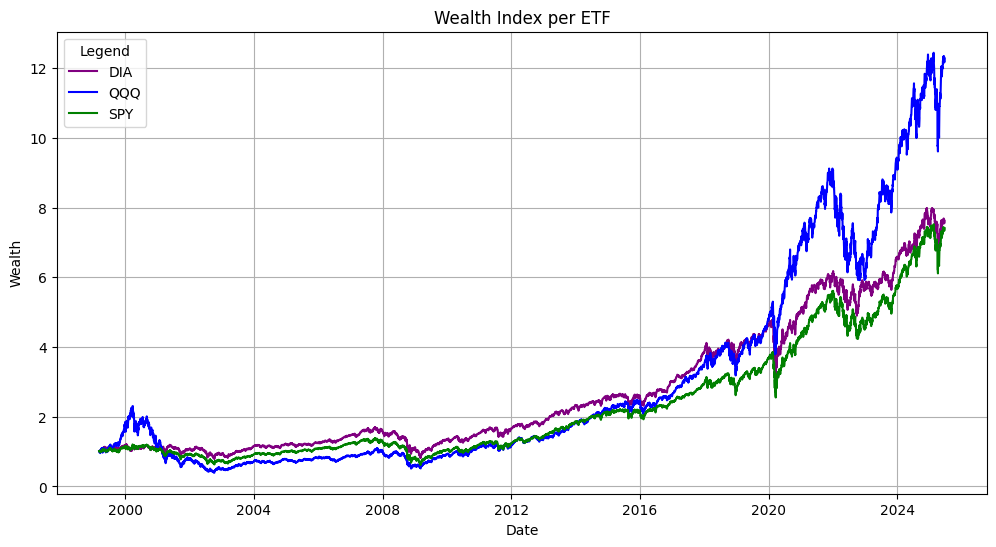

In [39]:
# Choose your colors for each ETF (you can use any color names or HEX codes)
colors = {
    'SPY': 'green',
    'QQQ': 'blue',
    'DIA': 'purple'
}

# Plot each ETF line
plt.figure(figsize=(12, 6))

for etf in etfs:
    plt.plot(wealth_index[etf], label=etf, color=colors[etf])

# Legend
plt.legend(loc='best', title='Legend')
plt.grid(True)
plt.title('Wealth Index per ETF')
plt.xlabel('Date')
plt.ylabel('Wealth')
plt.show()


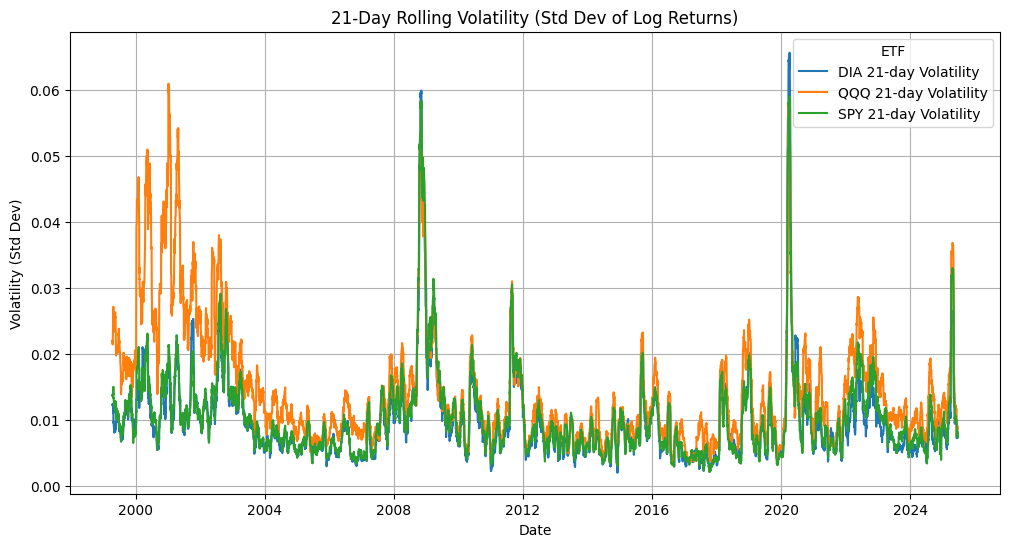

In [46]:
# Rolling window size (days)
window = 21  # approx. 1 trading month

# Compute rolling std for each ETF
rolling_volatility = log_returns[etfs].rolling(window).std()

# Plot
plt.figure(figsize=(12, 6))

for etf in etfs:
    plt.plot(rolling_volatility[etf], label=f'{etf} {window}-day Volatility')

plt.legend(loc='best', title='ETF')
plt.title(f'{window}-Day Rolling Volatility (Std Dev of Log Returns)')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev)')
plt.grid(True)
plt.show()
